Bi-LSTM Model

In [1]:
import pandas as pd
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


In [2]:
p = pd.read_csv('../data/external/medium_data.csv')
p.head()


,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


In [3]:
print("Number of records: ", p.shape[0])
print("Number of fields: ", p.shape[1])

Number of records:  6508
Number of fields:  10


In [4]:
p['title']

0       A Beginner’s Guide to Word Embedding with Gens...
1       Hands-on Graph Neural Networks with PyTorch & ...
2                            How to Use ggplot2 in Python
3       Databricks: How to Save Files in CSV on Your L...
4       A Step-by-Step Implementation of Gradient Desc...
                              ...                        
6503    “We” vs “I” — How Should You Talk About Yourse...
6504                     How Donald Trump Markets Himself
6505        Content and Marketing Beyond Mass Consumption
6506    5 Questions All Copywriters Should Ask Clients...
6507               How To Write a Good Business Blog Post
Name: title, Length: 6508, dtype: object

In [5]:
p['title'] = p['title'].apply(lambda x: x.replace(u'\xa0',u' '))
p['title'] = p['title'].apply(lambda x: x.replace('\u200a',' '))

In [6]:
tokenizer = Tokenizer(oov_token='<oov>')
tokenizer.fit_on_texts(p['title'])
total_words = len(tokenizer.word_index) + 1

print("Total number of words: ", total_words)
print("Word: ID")
print("------------")
print("<oov>: ", tokenizer.word_index['<oov>'])
print("Strong: ", tokenizer.word_index['strong'])
print("And: ", tokenizer.word_index['and'])
print("Consumption: ", tokenizer.word_index['consumption'])

Total number of words:  8238
Word: ID
------------
<oov>:  1
Strong:  4
And:  8
Consumption:  8237


In [7]:
input_sequences = []
for line in p['title']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    #print(token_list)

    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# print(input_sequences)
print("Total input sequences: ", len(input_sequences))

Total input sequences:  48461


In [28]:
max_sequence_len

40

In [8]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5, 676,
        68])

In [9]:
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)
print(xs[5])
print(labels[5])
print(ys[5][14])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    5  676   68    2  452 1518]
14
1.0


In [10]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=50, verbose=1)

print(model)

Epoch 1/50
1515/1515 [==============================] - 112s 72ms/step - loss: 6.9906 - accuracy: 0.0848
Epoch 2/50
1515/1515 [==============================] - 115s 76ms/step - loss: 6.1709 - accuracy: 0.1396
Epoch 3/50
1515/1515 [==============================] - 117s 77ms/step - loss: 5.6534 - accuracy: 0.1675
Epoch 4/50
1515/1515 [==============================] - 114s 75ms/step - loss: 5.1869 - accuracy: 0.1907
Epoch 5/50
1515/1515 [==============================] - 114s 75ms/step - loss: 4.7469 - accuracy: 0.2137
Epoch 6/50
1515/1515 [==============================] - 113s 74ms/step - loss: 4.3309 - accuracy: 0.2431
Epoch 7/50
1515/1515 [==============================] - 113s 75ms/step - loss: 3.9389 - accuracy: 0.2819
Epoch 8/50
1515/1515 [==============================] - 114s 75ms/step - loss: 3.5670 - accuracy: 0.3284
Epoch 9/50
1515/1515 [==============================] - 871s 575ms/step - loss: 3.2218 - accuracy: 0.3828
Epoch 10/50
1515/1515 [==============================]

In [12]:
import pickle

pickle.dump(tokenizer, open('../models/tokenizer.pkl', 'wb'))


model.save('../models/bilstm_nwp')


INFO:tensorflow:Assets written to: bilstm_nwp\assets


INFO:tensorflow:Assets written to: bilstm_nwp\assets


In [16]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()


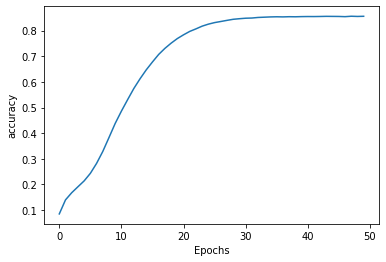

In [17]:
plot_graphs(history, 'accuracy')

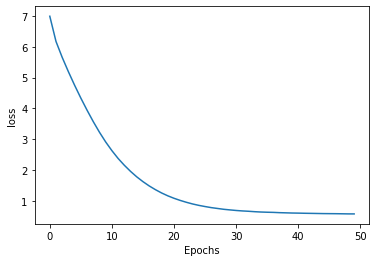

In [18]:
plot_graphs(history, 'loss')

In [8]:
# seed_text = "Data science is a field of"
# next_words = 10
# max_sequence_len = 40

# tokenizer = pickle.load( open('../models/tokenizer.pkl', 'rb'))
# new_model = tf.keras.models.load_model('../models/bilstm_nwp')


# for _ in range(next_words):
#     token_list = tokenizer.texts_to_sequences([seed_text])[0]
#     token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
# #     predicted = model.predict_classes(token_list, verbose=0)
#     predict_x=new_model.predict(token_list, verbose = 0) 
#     predicted=np.argmax(predict_x,axis=1)
#     output_word = ""
#     for word, index in tokenizer.word_index.items():
#         if index == predicted:
#             output_word = word
#             break
#     seed_text += " " + output_word
# print(seed_text)

In [11]:
input_text = 'Artificial intelligence can be used in '
max_sequence_len = 40

tokenizer = pickle.load( open('../models/tokenizer.pkl', 'rb'))
new_model = tf.keras.models.load_model('../models/bilstm_nwp')

token_list = tokenizer.texts_to_sequences([input_text])[0]
token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
#     predicted = model.predict_classes(token_list, verbose=0)
predict_x=new_model.predict(token_list, verbose = 0) 
predict_x = predict_x.reshape(-1)

sorted_indices = np.argsort(predict_x)[::-1]

# Get the top 10 values and their indices
top_5_score = predict_x[sorted_indices[:5]]
top_5_indices = sorted_indices[:5]

def get_word_for_index(pred_index):
    for word, index in tokenizer.word_index.items():
        if pred_index == index:
            return word
        
    
top_5_words = [get_word_for_index(i) for i in top_5_indices ]
print(top_5_words)
print(top_5_score)

<IPython.core.display.Javascript object>

['market', 'not', '2020', 'marketing', 'a']
[0.2350564  0.1617463  0.14085849 0.07322162 0.0474061 ]
